In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

580

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f560aea4c884fb8593748eda08bb57f


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | narsaq
Processing Record 2 of Set 1 | bihariganj
Processing Record 3 of Set 1 | altamont
Processing Record 4 of Set 1 | haimen
Processing Record 5 of Set 1 | zhuhai
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | garowe
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | eureka
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | keetmanshoop
Processing Record 17 of Set 1 | mocuba
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | busselton
Processing Record 23 of 

City not found. Skipping...
Processing Record 40 of Set 4 | keshan
City not found. Skipping...
Processing Record 41 of Set 4 | hibbing
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | tarudant
City not found. Skipping...
Processing Record 44 of Set 4 | beloha
Processing Record 45 of Set 4 | prieska
Processing Record 46 of Set 4 | muros
Processing Record 47 of Set 4 | heishan
Processing Record 48 of Set 4 | barrow
Processing Record 49 of Set 4 | inhambane
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | port blair
Processing Record 3 of Set 5 | zhicheng
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | prainha
Processing Record 6 of Set 5 | ugoofaaru
Processing Record 7 of Set 5 | homer
Processing Record 8 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 5 | airai
Processing Record 10 of Set 5 | flinders
Processing Record 11 of Se

Processing Record 29 of Set 8 | maralal
Processing Record 30 of Set 8 | diego de almagro
Processing Record 31 of Set 8 | krasnoselkup
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | baykit
Processing Record 34 of Set 8 | mvomero
Processing Record 35 of Set 8 | whitehorse
Processing Record 36 of Set 8 | comodoro rivadavia
Processing Record 37 of Set 8 | asau
Processing Record 38 of Set 8 | teya
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | saint-leu
Processing Record 41 of Set 8 | mackay
Processing Record 42 of Set 8 | san patricio
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | kalmunai
Processing Record 45 of Set 8 | lethem
Processing Record 46 of Set 8 | kantemirovka
Processing Record 47 of Set 8 | valenza
Processing Record 48 of Set 8 | soe
Processing Record 49 of Set 8 | rawson
Processing Record 50 of Set 8 | vertientes
Processing Record 1 of Set 9 | nanortalik
Processing Record 2 of Set 9 | kem
Processing 

Processing Record 14 of Set 12 | hirtshals
Processing Record 15 of Set 12 | harper
Processing Record 16 of Set 12 | dzilam gonzalez
Processing Record 17 of Set 12 | gat
Processing Record 18 of Set 12 | nouadhibou
Processing Record 19 of Set 12 | platanos
Processing Record 20 of Set 12 | kopervik
Processing Record 21 of Set 12 | guantanamo
Processing Record 22 of Set 12 | banjar
Processing Record 23 of Set 12 | manta
Processing Record 24 of Set 12 | port macquarie
Processing Record 25 of Set 12 | tazovskiy
Processing Record 26 of Set 12 | okha
Processing Record 27 of Set 12 | jalu
Processing Record 28 of Set 12 | yatsushiro
Processing Record 29 of Set 12 | havelock
Processing Record 30 of Set 12 | uppsala
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Narsaq,60.9167,-46.0500,39.20,30,75,32.21,GL,2021-01-31 14:56:42
1,Bihariganj,25.7333,86.9833,56.37,44,0,6.38,IN,2021-01-31 14:56:43
2,Altamont,42.2068,-121.7372,35.60,69,75,13.80,US,2021-01-31 14:53:24
3,Haimen,23.1935,116.6142,59.00,82,0,3.20,CN,2021-01-31 14:56:43
4,Zhuhai,22.2769,113.5678,70.00,82,40,4.61,CN,2021-01-31 14:56:43
5,Castro,-24.7911,-50.0119,70.95,80,100,7.25,BR,2021-01-31 14:56:43
6,Butaritari,3.0707,172.7902,80.46,82,47,13.76,KI,2021-01-31 14:56:43
7,Garowe,8.4054,48.4845,80.82,24,0,9.15,SO,2021-01-31 14:56:43
8,Kaitangata,-46.2817,169.8464,61.00,91,100,2.53,NZ,2021-01-31 14:56:43
9,Eureka,40.8021,-124.1637,55.40,62,90,18.41,US,2021-01-31 14:56:43


In [11]:
new_column_order = ["City","Country","Date","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Narsaq,GL,2021-01-31 14:56:42,2021-01-31 14:56:42,60.9167,-46.0500,39.20,30,75,32.21
1,Bihariganj,IN,2021-01-31 14:56:43,2021-01-31 14:56:43,25.7333,86.9833,56.37,44,0,6.38
2,Altamont,US,2021-01-31 14:53:24,2021-01-31 14:53:24,42.2068,-121.7372,35.60,69,75,13.80
3,Haimen,CN,2021-01-31 14:56:43,2021-01-31 14:56:43,23.1935,116.6142,59.00,82,0,3.20
4,Zhuhai,CN,2021-01-31 14:56:43,2021-01-31 14:56:43,22.2769,113.5678,70.00,82,40,4.61
...,...,...,...,...,...,...,...,...,...,...
528,Okha,RU,2021-01-31 14:58:06,2021-01-31 14:58:06,53.5739,142.9478,-9.08,81,99,24.09
529,Jalu,LY,2021-01-31 14:58:06,2021-01-31 14:58:06,29.0331,21.5482,78.17,18,0,12.95
530,Yatsushiro,JP,2021-01-31 14:58:06,2021-01-31 14:58:06,32.5000,130.6000,41.00,56,3,4.00
531,Havelock,US,2021-01-31 14:58:06,2021-01-31 14:58:06,34.8791,-76.9013,53.01,91,100,1.01


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

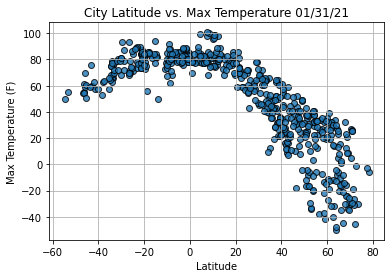

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

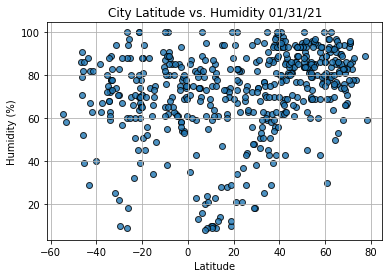

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

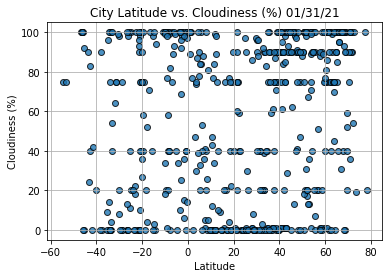

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

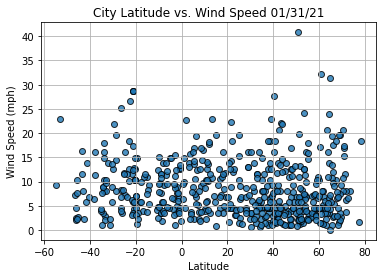

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

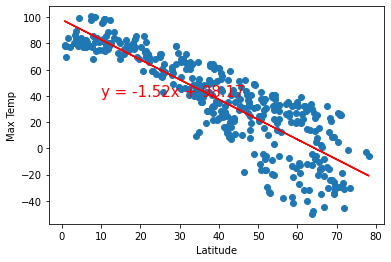

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

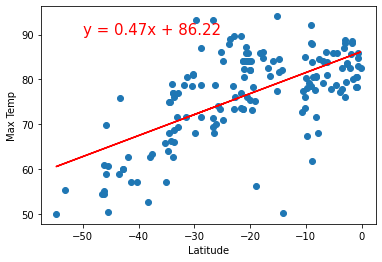

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

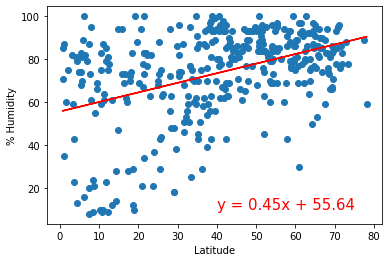

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

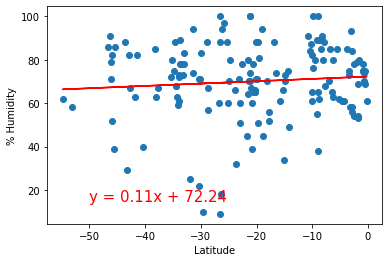

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

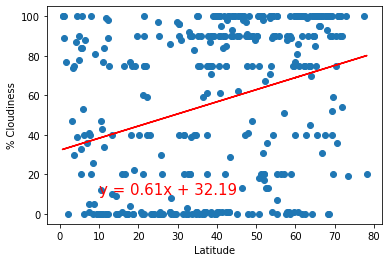

In [40]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,10))

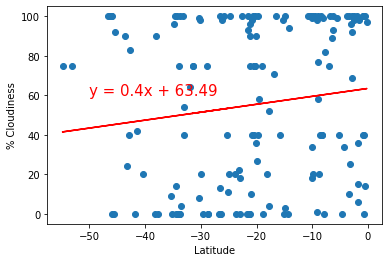

In [39]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

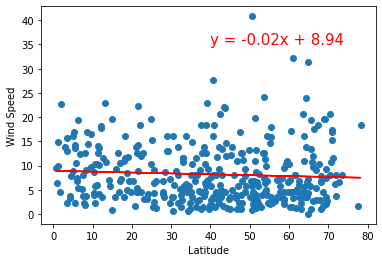

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

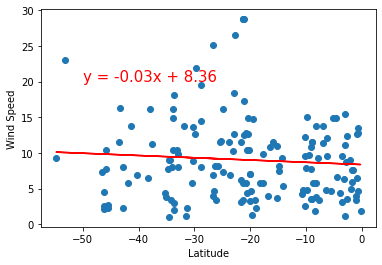

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))